In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [22]:
"conda install -c anaconda py-xgboost"

'conda install -c anaconda py-xgboost'

## Imports

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.simplefilter("ignore")

In [24]:
os.chdir("C:\\Users\\KIRTI RAJ PRADHAN\\Downloads")

In [25]:
df=pd.read_csv("mushrooms.csv")

In [26]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## EDA 

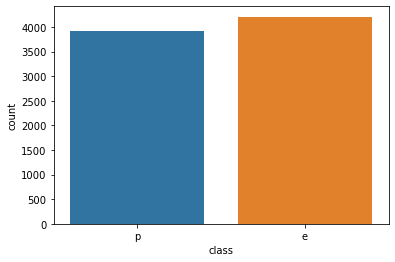

In [28]:
sns.countplot(data=df,x='class')
plt.show()

In [29]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [30]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [39]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [46]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## X & y

In [51]:
X=pd.get_dummies(df.drop("class",axis=1),drop_first=True)
y=pd.get_dummies(df.drop(columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],axis=1),drop_first=True)

## Train Test | Split

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=101)

## Modelling - Gradient Boosting

In [53]:
from xgboost import XGBClassifier

In [54]:
xgb_model=XGBClassifier()

In [55]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

### Prediction

In [56]:
train_pred=xgb_model.predict(X_train)

In [58]:
test_pred=xgb_model.predict(X_test)

### Accuracy

In [59]:
from sklearn.metrics import accuracy_score
print("Train data: ",accuracy_score(y_train,train_pred))
print("Test data: ",accuracy_score(y_test,test_pred))

Train data:  1.0
Test data:  1.0


In [63]:
# Applying K-fold for cross validation 
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=xgb_model,X=X_train,y=y_train,cv=5)
accuracies.mean()

1.0

In [70]:
scores=cross_val_score(xgb_model,X,y,cv=5)
print(scores)
print(scores.mean())

[0.84246154 1.         0.99753846 1.         0.82758621]
0.9335172413793102


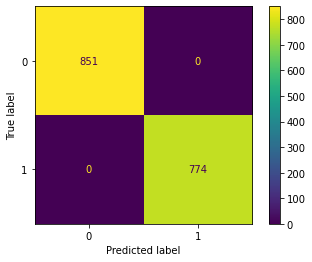

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb_model,X_test,y_test)

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [71]:
from sklearn.model_selection import GridSearchCV

In [76]:
estimator=XGBClassifier()
param_grid={"n_estimators":[1,5,10,20,40,100],'max_depth':[3,4,5,6],'gamma':[0,0.1,0.2,0.3,0.5,1]}

In [77]:
grid=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [78]:
grid.best_params_

{'gamma': 0, 'max_depth': 3, 'n_estimators': 40}

In [79]:
final_model=XGBClassifier()
final_model.fit(X_train,y_train)

y_train_pred=final_model.predict(X_train)
y_test_pred=final_model.predict(X_test)

print("Train accuracy: ",accuracy_score(y_train,y_train_pred))
print("Test accuracy: ",accuracy_score(y_test,y_test_pred))

Train accuracy:  1.0
Test accuracy:  1.0


## Feature Importance

In [80]:
final_model.feature_importances_

array([0.0000000e+00, 4.9245332e-06, 0.0000000e+00, 0.0000000e+00,
       2.9908917e-05, 0.0000000e+00, 3.5458699e-05, 4.2419060e-06,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.1497971e-03,
       4.3542666e-04, 2.8533060e-02, 0.0000000e+00, 2.1036485e-02,
       4.0596139e-02, 0.0000000e+00, 1.8312100e-01, 3.6745731e-02,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 2.4554979e-03,
       1.8244203e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 5.8200629e-04, 0.0000000e+00,
       1.5037382e-04, 2.1428533e-04, 3.4134299e-01, 1.5605363e-04,
       2.0370118e-01, 3.6950543e-04, 1.2041000e-04, 0.0000000e+00,
       0.0000000e+00, 1.4341010e-05, 1.5355076e-02, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e

In [81]:
imp_feats = pd.DataFrame(index=X.columns,data=final_model.feature_importances_,columns=['Importance'])
imp_feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000005
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000030
...,...
habitat_l,0.000450
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [93]:
imp_feats = imp_feats[imp_feats['Importance'] > 0.0000001]

In [94]:
imp_feats

,Importance
bruises_t,0.028533
odor_f,0.021036
odor_l,0.040596
odor_n,0.183121
odor_p,0.036746
stalk-root_c,0.341343
stalk-root_r,0.203701
stalk-surface-below-ring_y,0.015355
spore-print-color_r,0.027045
spore-print-color_u,0.091799


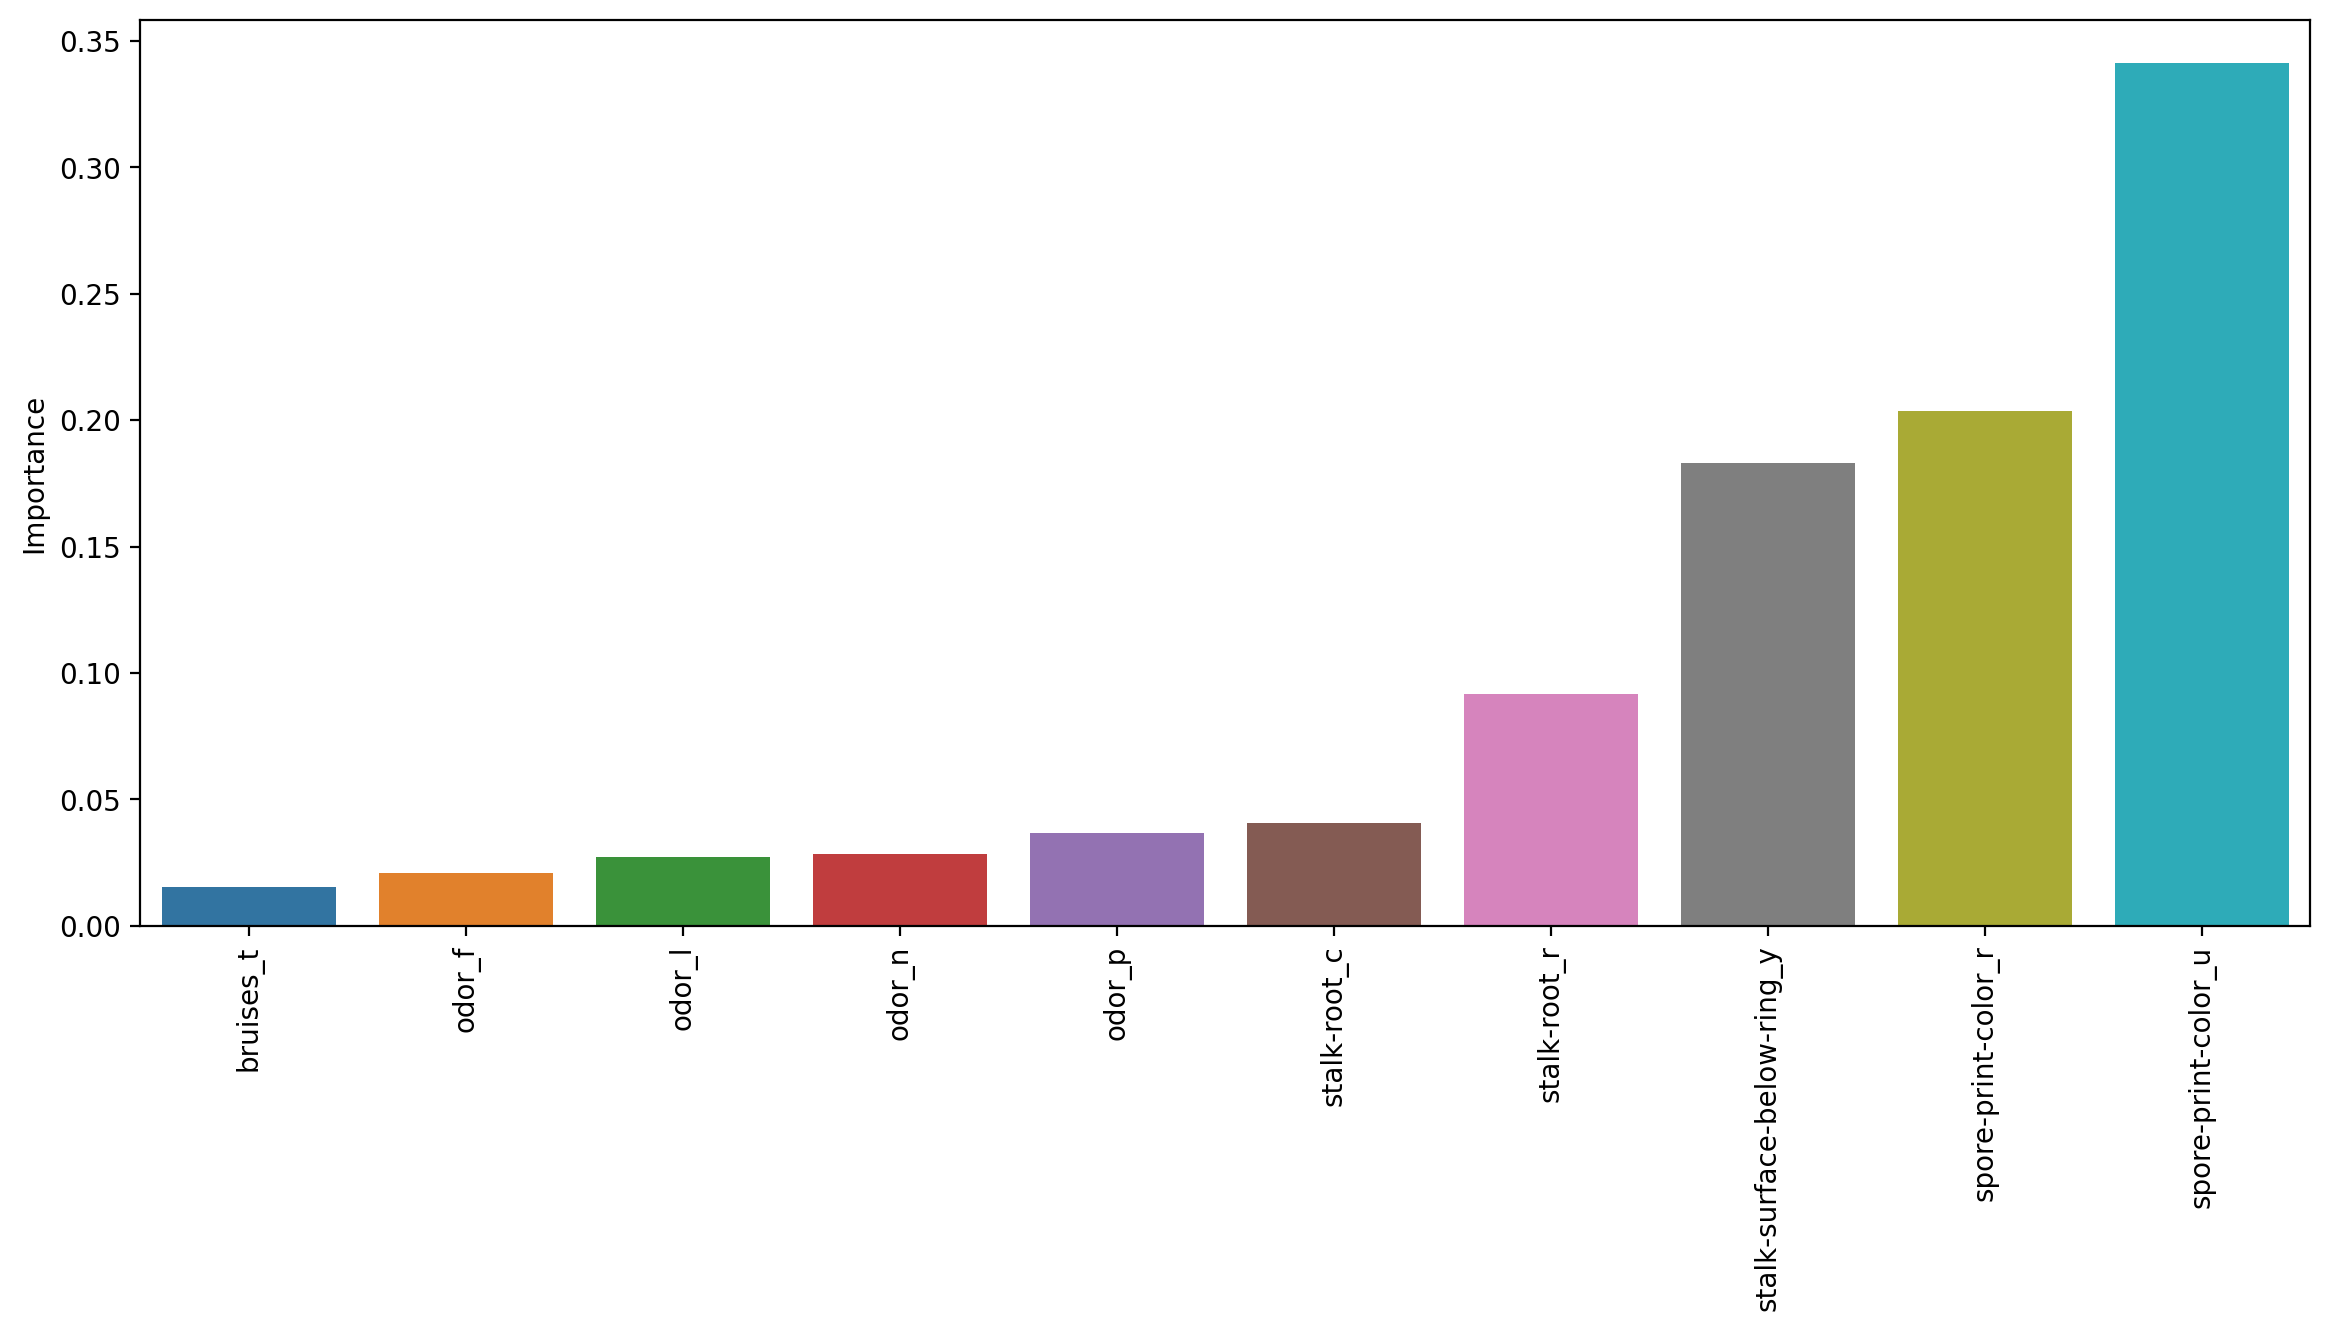

In [95]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feats.sort_values('Importance'),x=imp_feats.index,y='Importance')
plt.xticks(rotation=90);